## Initial imports

In [1]:
from scm.plams import *
from ase.optimize import BFGS
from ase.build import molecule as ase_build_molecule
from ase.visualize.plot import plot_atoms
from ase.build import fcc111
import matplotlib.pyplot as plt

## Helper functions

In [2]:
def printsummary(mol, details=None):
    s = f'{len(mol)} atoms, density = {mol.get_density()*1e-3:.3f} g/cm^3, box = {mol.lattice[0][0]:.3f}, {mol.lattice[1][1]:.3f}, {mol.lattice[2][2]:.3f}, formula = {mol.get_formula()}'
    if details:
        s+= f'\n#added molecules per species: {details["n_molecules"]}, mole fractions: {details["mole_fractions"]}'
    print(s)
    
def show(mol, figsize=None, **kwargs):
    """ Show a molecule in a Jupyter notebook """
    plt.figure(figsize=figsize or (2,2))
    plt.axis('off')
    plot_atoms(toASE(mol), **kwargs)

## Liquid water (fluid with 1 component)
First, create the gasphase molecule:

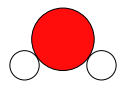

In [3]:
water = from_smiles('O')
show(water)

pure liquid from approximate number of atoms and exact density (in g/cm^3), cubic box with auto-determined size
195 atoms, density = 1.000 g/cm^3, box = 12.482, 12.482, 12.482, formula = H130O65


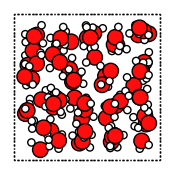

In [4]:
print('pure liquid from approximate number of atoms and exact density (in g/cm^3), cubic box with auto-determined size')
out = packmol(water, n_atoms=194, density=1.0)
printsummary(out)
out.write('water-1.xyz')
show(out)

pure liquid from approximate density (in g/cm^3) and an orthorhombic box
135 atoms, density = 1.002 g/cm^3, box = 8.000, 12.000, 14.000, formula = H90O45


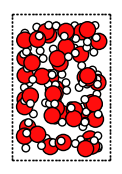

In [5]:
print('pure liquid from approximate density (in g/cm^3) and an orthorhombic box')
out = packmol(water, density=1.0, box_bounds=[0., 0., 0., 8., 12., 14.])
printsummary(out)
out.write('water-2.xyz')
show(out)

pure liquid with explicit number of molecules and exact density
192 atoms, density = 1.000 g/cm^3, box = 12.417, 12.417, 12.417, formula = H128O64


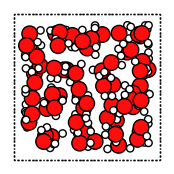

In [6]:
print('pure liquid with explicit number of molecules and exact density')
out = packmol(water, n_molecules=64, density=1.0)
printsummary(out)
out.write('water-3.xyz')
show(out)

pure liquid with explicit number of molecules and box
192 atoms, density = 0.877 g/cm^3, box = 12.000, 13.000, 14.000, formula = H128O64


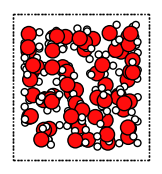

In [7]:
print('pure liquid with explicit number of molecules and box')
out = packmol(water, n_molecules=64, box_bounds=[0., 0., 0., 12., 13., 14.])
printsummary(out)
out.write('water-4.xyz')
show(out)

water-5.xyz: pure liquid in non-orthorhombic box (requires AMS2022 or later)
PLAMS working folder: /home/hellstrom/adfhome/scripting/scm/plams/doc/source/examples/PackMolExample/plams_workdir
Top: system in surrounding orthorhombic box before calling refine_lattice(). Bottom: System in non-orthorhombic box after calling refine_lattice()


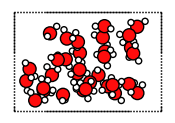

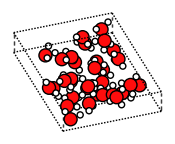

In [8]:
print('water-5.xyz: pure liquid in non-orthorhombic box (requires AMS2022 or later)')
# first place the molecules in a cuboid surrounding the desired lattice
# then gradually change into the desired lattice using refine_lattice()
# note that the molecules may become distorted by this procedure
lattice = [[10., 2., -1.], [-5., 8., 0.], [0., -2., 11.]]
temp_out = packmol(water, n_molecules=32, box_bounds=[
    0, 0, 0,
    max(lattice[i][0] for i in range(3))-min(lattice[i][0] for i in range(3)),
    max(lattice[i][1] for i in range(3))-min(lattice[i][1] for i in range(3)),
    max(lattice[i][2] for i in range(3))-min(lattice[i][2] for i in range(3))
])
out = refine_lattice(temp_out, lattice=lattice)
if out is not None:
    out.write('water-5.xyz')
    print('Top: system in surrounding orthorhombic box before calling refine_lattice(). Bottom: System in non-orthorhombic box after calling refine_lattice()')
    show(temp_out)
    show(out)

## Water-acetonitrile mixture (fluid with 2 or more components)
Let's also create a single acetonitrile molecule:

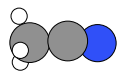

In [4]:
acetonitrile = from_smiles('CC#N')
show(acetonitrile)

Set the desired mole fractions and density. Here, the density is calculated as the weighted average of water (1.0 g/cm^3) and acetonitrile (0.76 g/cm^3) densities, but you could use any other density.

In [10]:
# MIXTURES
x_water = 0.666                # mole fraction
x_acetonitrile = 1-x_water     # mole fraction
density = (x_water*1.0 + x_acetonitrile*0.76) / (x_water + x_acetonitrile)  # weighted average of pure component densities

print(f'\nMIXTURES. x_water = {x_water:.3f}, x_acetonitrile = {x_acetonitrile:.3f}, target density = {density:.3f} g/cm^3\n')


MIXTURES. x_water = 0.666, x_acetonitrile = 0.334, target density = 0.920 g/cm^3



By setting ``return_details=True``, you can get information about the mole fractions of the returned system. They may not exactly match the mole fractions you put in.

2-1 water-acetonitrile from approximate number of atoms and exact density (in g/cm^3), cubic box with auto-determined size
201 atoms, density = 0.920 g/cm^3, box = 13.263, 13.263, 13.263, formula = C34H117N17O33
#added molecules per species: [33, 17], mole fractions: [0.66, 0.34]


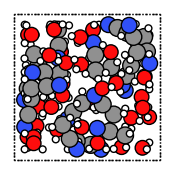

In [11]:
print('2-1 water-acetonitrile from approximate number of atoms and exact density (in g/cm^3), cubic box with auto-determined size')
out, details = packmol(molecules=[water, acetonitrile], mole_fractions=[x_water, x_acetonitrile], n_atoms=200, density=density, return_details=True)
printsummary(out, details)
out.write('water-acetonitrile-1.xyz')
show(out)

The ``details`` is a dictionary as follows:

In [12]:
for k, v in details.items():
    print(f'{k}: {v}')

n_molecules: [33, 17]
mole_fractions: [0.66, 0.34]
n_atoms: 201
molecule_type_indices: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
molecule_indices: [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 

2-1 water-acetonitrile from approximate density (in g/cm^3) and box bounds
201 atoms, density = 0.933 g/cm^3, box = 13.200, 13.200, 13.200, formula = C34H117N17O33
#added molecules per species: [33, 17], mole fractions: [0.66, 0.34]


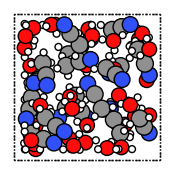

In [13]:
print('2-1 water-acetonitrile from approximate density (in g/cm^3) and box bounds')
out, details = packmol(molecules=[water, acetonitrile], mole_fractions=[x_water, x_acetonitrile], box_bounds=[0, 0, 0, 13.2, 13.2, 13.2], density=density, return_details=True)
printsummary(out, details)
out.write('water-acetonitrile-2.xyz')
show(out)

2-1 water-acetonitrile from explicit number of molecules and density, cubic box with auto-determined size
192 atoms, density = 0.920 g/cm^3, box = 13.058, 13.058, 13.058, formula = C32H112N16O32
#added molecules per species: [32, 16], mole fractions: [0.6666666666666666, 0.3333333333333333]


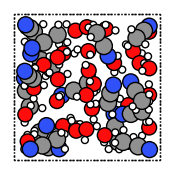

In [14]:
print('2-1 water-acetonitrile from explicit number of molecules and density, cubic box with auto-determined size')
out, details = packmol(molecules=[water, acetonitrile], n_molecules=[32, 16], density=density, return_details=True)
printsummary(out, details)
out.write('water-acetonitrile-3.xyz')
show(out)

2-1 water-acetonitrile from explicit number of molecules and box
192 atoms, density = 0.890 g/cm^3, box = 13.200, 13.200, 13.200, formula = C32H112N16O32


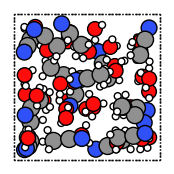

In [15]:
print('2-1 water-acetonitrile from explicit number of molecules and box')
out = packmol(molecules=[water, acetonitrile], n_molecules=[32, 16], box_bounds=[0, 0, 0, 13.2, 13.2, 13.2])
printsummary(out)
out.write('water-acetonitrile-4.xyz')
show(out)

## Solid-liquid or solid-gas interfaces
First, create a slab using the ASE ``fcc111`` function

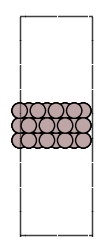

In [16]:
rotation = ('90x,0y,0z')  # sideview of slab
figsize = (3,3)
slab = fromASE(fcc111('Al', size=(4,6,3), vacuum=15.0, orthogonal=True, periodic=True))
show(slab, figsize=figsize, rotation=rotation)

water surrounding an Al slab, from an approximate density
534 atoms, density = 1.325 g/cm^3, box = 11.455, 14.881, 34.677, formula = Al72H308O154


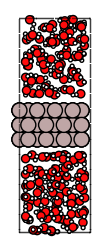

In [17]:
print('water surrounding an Al slab, from an approximate density')
out = packmol_on_slab(slab, water, density=1.0)
printsummary(out)
out.write('al-water-pure.xyz')
show(out, figsize=figsize, rotation=rotation)

2-1 water-acetonitrile mixture surrounding an Al slab, from mole fractions and an approximate density
468 atoms, density = 1.260 g/cm^3, box = 11.455, 14.881, 34.677, formula = C66H231Al72N33O66


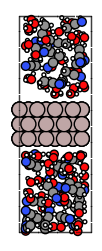

In [18]:
print('2-1 water-acetonitrile mixture surrounding an Al slab, from mole fractions and an approximate density')
out = packmol_on_slab(slab, [water, acetonitrile], mole_fractions=[x_water, x_acetonitrile], density=density)
printsummary(out)
out.write('al-water-acetonitrile.xyz')
show(out, figsize=figsize, rotation=rotation)

## Microsolvation
``packmol_microsolvation`` can create a microsolvation sphere around a solute.

Microsolvated structure: 81 atoms.


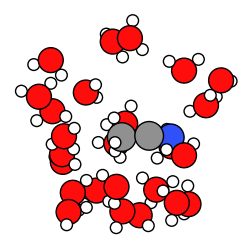

In [19]:
out = packmol_microsolvation(solute=acetonitrile, solvent=water, density=1.5, threshold=4.0)
# for microsolvation it's a good idea to have a higher density than normal to get enough solvent molecules
print(f"Microsolvated structure: {len(out)} atoms.")
out.write('acetonitrile-microsolvated.xyz')
show(out, figsize=figsize)

## Bonds, atom properties (force field types, regions, ...)

The ``packmol()`` function accepts the arguments ``keep_bonds`` and ``keep_atom_properties``. These options will keep the bonds defined for the constitutent molecules, as well as any atomic properties.

The bonds and atom properties are easiest to see by printing the System block for an AMS job:

In [16]:
water = from_smiles('O')
n2 = from_smiles('N#N')

# delete properties coming from from_smiles
for at in water:
    at.properties = Settings()
for at in n2:
    at.properties = Settings()
    
water[1].properties.region = "oxygen_atom"
water[2].properties.mass = 2.014   # deuterium
water.delete_bond(water[1, 2]) # delete bond between atoms 1 and 2 (O and H)

In [17]:
out = packmol([water, n2], n_molecules=[2, 1], density=0.5)
print(AMSJob(molecule=out).get_input())

system
  Atoms
              O       3.0728760000       3.9143770000       1.9903040000 region=mol0,oxygen_atom
              H       3.9160850000       3.5184940000       1.6850930000 mass=2.014 region=mol0
              H       2.7876040000       4.6565520000       1.4140990000 region=mol0
              O       4.9258210000       3.8909400000       3.9982150000 region=mol0,oxygen_atom
              H       4.9810380000       3.6502800000       4.9468530000 mass=2.014 region=mol0
              H       5.0008460000       4.8604790000       3.8619060000 region=mol0
              N       1.1338120000       1.0294860000       0.9890770000 region=mol1
              N       0.9243670000       1.6667980000       1.8734330000 region=mol1
  End
  BondOrders
     1 3 1.0
     4 6 1.0
     7 8 3.0
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000     5.9692549746
  End
End




By default, the ``packmol()`` function assigns regions called ``mol0``, ``mol1``, etc. to the different added molecules. The ``region_names`` option lets you set custom names. 

In [18]:
out = packmol(
    [water, n2], n_molecules=[2, 1], density=0.5, 
    region_names=["water", "nitrogen_molecule"]
)
print(AMSJob(molecule=out).get_input())

system
  Atoms
              O       3.0728760000       3.9143770000       1.9903040000 region=oxygen_atom,water
              H       3.9160850000       3.5184940000       1.6850930000 mass=2.014 region=water
              H       2.7876040000       4.6565520000       1.4140990000 region=water
              O       4.9258210000       3.8909400000       3.9982150000 region=oxygen_atom,water
              H       4.9810380000       3.6502800000       4.9468530000 mass=2.014 region=water
              H       5.0008460000       4.8604790000       3.8619060000 region=water
              N       1.1338120000       1.0294860000       0.9890770000 region=nitrogen_molecule
              N       0.9243670000       1.6667980000       1.8734330000 region=nitrogen_molecule
  End
  BondOrders
     1 3 1.0
     4 6 1.0
     7 8 3.0
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000   

Below, we also set ``keep_atom_properties=False``, this will remove the previous regions (in this example "oxygen_atom") and mass. 

In [25]:
out = packmol(
    [water, n2], n_molecules=[2, 1], density=0.5, 
    keep_atom_properties=False
)
print(AMSJob(molecule=out).get_input())

system
  Atoms
              O       3.0728760000       3.9143770000       1.9903040000 region=mol0
              H       3.9160850000       3.5184940000       1.6850930000 region=mol0
              H       2.7876040000       4.6565520000       1.4140990000 region=mol0
              O       4.9258210000       3.8909400000       3.9982150000 region=mol0
              H       4.9810380000       3.6502800000       4.9468530000 region=mol0
              H       5.0008460000       4.8604790000       3.8619060000 region=mol0
              N       1.1338120000       1.0294860000       0.9890770000 region=mol1
              N       0.9243670000       1.6667980000       1.8734330000 region=mol1
  End
  BondOrders
     1 3 1.0
     4 6 1.0
     7 8 3.0
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000     5.9692549746
  End
End




``keep_bonds=False`` will additionally ignore any defined bonds:

In [21]:
out = packmol(
    [water, n2], n_molecules=[2, 1], density=0.5, 
    region_names=["water", "nitrogen_molecule"], 
    keep_bonds=False, keep_atom_properties=False
)
print(AMSJob(molecule=out).get_input())

system
  Atoms
              O       3.0728760000       3.9143770000       1.9903040000 region=water
              H       3.9160850000       3.5184940000       1.6850930000 region=water
              H       2.7876040000       4.6565520000       1.4140990000 region=water
              O       4.9258210000       3.8909400000       3.9982150000 region=water
              H       4.9810380000       3.6502800000       4.9468530000 region=water
              H       5.0008460000       4.8604790000       3.8619060000 region=water
              N       1.1338120000       1.0294860000       0.9890770000 region=nitrogen_molecule
              N       0.9243670000       1.6667980000       1.8734330000 region=nitrogen_molecule
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000     5.9692549746
  End
End


